In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

TensorFlow is a Python library for fast numerical computing that can be used to create Deep Learning models directly.
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.
Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
	help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...
11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

SyntaxError: ignored

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 2.2738 - accuracy: 0.1997 - val_loss: 2.2323 - val_accuracy: 0.2855
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1974 - accuracy: 0.4117 - val_loss: 2.1543 - val_accuracy: 0.5436
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 2.1063 - accuracy: 0.5562 - val_loss: 2.0426 - val_accuracy: 0.5949
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.9731 - accuracy: 0.6182 - val_loss: 1.8819 - val_accuracy: 0.6224
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 1.7879 - accuracy: 0.6570 - val_loss: 1.6697 - val_accuracy: 0.6906
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 1.5681 - accuracy: 0.6919 - val_loss: 1.4445 - val_accuracy: 0.7249
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 1.3555 - accuracy: 0.7220 - val_loss: 1

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2711 - accuracy: 0.1964 - val_loss: 2.2350 - val_accuracy: 0.2922
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 2.2038 - accuracy: 0.3958 - val_loss: 2.1632 - val_accuracy: 0.5878
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1198 - accuracy: 0.5580 - val_loss: 2.0608 - val_accuracy: 0.5542
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 1.9981 - accuracy: 0.6259 - val_loss: 1.9134 - val_accuracy: 0.6949
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 1.8269 - accuracy: 0.6710 - val_loss: 1.7143 - val_accuracy: 0.7093
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 1.6159 - accuracy: 0.7092 - val_loss: 1.4899 - val_accuracy: 0.7389
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 1.3973 - accuracy: 0.7372 - val_loss: 1.

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.87      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



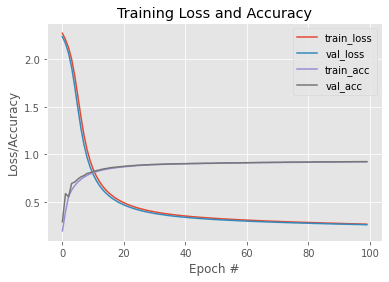

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])